<a href="https://colab.research.google.com/github/mixhub10/C4_project/blob/kmj/%EC%A2%85%ED%95%A9%EC%8B%A4%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 후판공장 scale 불량



In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
!pip install matplotlib -U
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [49]:
import matplotlib.pyplot as plt # 다운 받은 글꼴 plt에 적용
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [50]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DA_project/SCALE불량.csv', encoding = 'euc-kr')
df

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


## 데이터 강종별 분리
- T or C

### 강종(Steel_kind) - T

In [51]:
df_T = df[df['steel_kind'] == 'T']
df_T

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,PLT_1619,07JAN2023:14:58:32,양품,AB/EH36-TM,미국,T,77,2600,7900,적용,...,1103,68,1122,143,300,1122,TMCP(온도제어),848,6,3조
619,PLT_1620,07JAN2023:15:05:39,양품,BV-AH36-TL,프랑스,T,74,1800,10000,적용,...,1144,102,1123,139,337,1123,CR(제어압연),814,6,3조
620,PLT_1621,07JAN2023:15:19:34,양품,COMMON,공통,T,76,1800,16700,적용,...,1124,77,1127,143,326,1127,CR(제어압연),811,6,3조
621,PLT_1622,07JAN2023:15:29:23,불량,BV-AH36-TL,프랑스,T,76,1800,9800,미적용,...,1123,55,1135,104,217,1135,CR(제어압연),811,6,3조


#### 요약 통계량

In [52]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 622
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         245 non-null    object
 1   rolling_date     245 non-null    object
 2   scale            245 non-null    object
 3   spec_long        245 non-null    object
 4   spec_country     245 non-null    object
 5   steel_kind       245 non-null    object
 6   pt_thick         245 non-null    int64 
 7   pt_width         245 non-null    int64 
 8   pt_length        245 non-null    int64 
 9   hsb              245 non-null    object
 10  fur_no           245 non-null    object
 11  fur_input_row    245 non-null    object
 12  fur_heat_temp    245 non-null    int64 
 13  fur_heat_time    245 non-null    int64 
 14  fur_soak_temp    245 non-null    int64 
 15  fur_soak_time    245 non-null    int64 
 16  fur_total_time   245 non-null    int64 
 17  fur_ex_temp      245 non-null    in

In [53]:
df_T.describe()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,52.461224,2638.367347,17428.979592,1138.832653,95.955102,1127.253061,89.420408,266.559184,1127.253061,849.693878,6.448980
std,17.173522,461.995613,7732.485297,17.519794,25.268436,8.185931,23.343277,32.308096,8.185931,117.616040,0.988898
min,13.000000,1800.000000,7900.000000,1103.000000,55.000000,1113.000000,48.000000,192.000000,1113.000000,0.000000,5.000000
25%,40.000000,2300.000000,12000.000000,1127.000000,74.000000,1123.000000,72.000000,244.000000,1123.000000,839.000000,6.000000
50%,50.000000,2500.000000,15900.000000,1137.000000,94.000000,1126.000000,86.000000,263.000000,1126.000000,856.000000,6.000000
75%,68.000000,3100.000000,21800.000000,1149.000000,116.000000,1129.000000,105.000000,286.000000,1129.000000,888.000000,6.000000
max,90.000000,4100.000000,54500.000000,1200.000000,158.000000,1165.000000,145.000000,351.000000,1165.000000,1057.000000,10.000000


#### 데이터 정제

##### 결측값 확인

In [54]:
df_T.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

##### 이상치 확인

In [55]:
df_T

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,PLT_1619,07JAN2023:14:58:32,양품,AB/EH36-TM,미국,T,77,2600,7900,적용,...,1103,68,1122,143,300,1122,TMCP(온도제어),848,6,3조
619,PLT_1620,07JAN2023:15:05:39,양품,BV-AH36-TL,프랑스,T,74,1800,10000,적용,...,1144,102,1123,139,337,1123,CR(제어압연),814,6,3조
620,PLT_1621,07JAN2023:15:19:34,양품,COMMON,공통,T,76,1800,16700,적용,...,1124,77,1127,143,326,1127,CR(제어압연),811,6,3조
621,PLT_1622,07JAN2023:15:29:23,불량,BV-AH36-TL,프랑스,T,76,1800,9800,미적용,...,1123,55,1135,104,217,1135,CR(제어압연),811,6,3조


##### 연속형 데이터

In [56]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 622
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         245 non-null    object
 1   rolling_date     245 non-null    object
 2   scale            245 non-null    object
 3   spec_long        245 non-null    object
 4   spec_country     245 non-null    object
 5   steel_kind       245 non-null    object
 6   pt_thick         245 non-null    int64 
 7   pt_width         245 non-null    int64 
 8   pt_length        245 non-null    int64 
 9   hsb              245 non-null    object
 10  fur_no           245 non-null    object
 11  fur_input_row    245 non-null    object
 12  fur_heat_temp    245 non-null    int64 
 13  fur_heat_time    245 non-null    int64 
 14  fur_soak_temp    245 non-null    int64 
 15  fur_soak_time    245 non-null    int64 
 16  fur_total_time   245 non-null    int64 
 17  fur_ex_temp      245 non-null    in

> rolling_date

> pt_thick

Text(0.5, 1.0, 'hist')

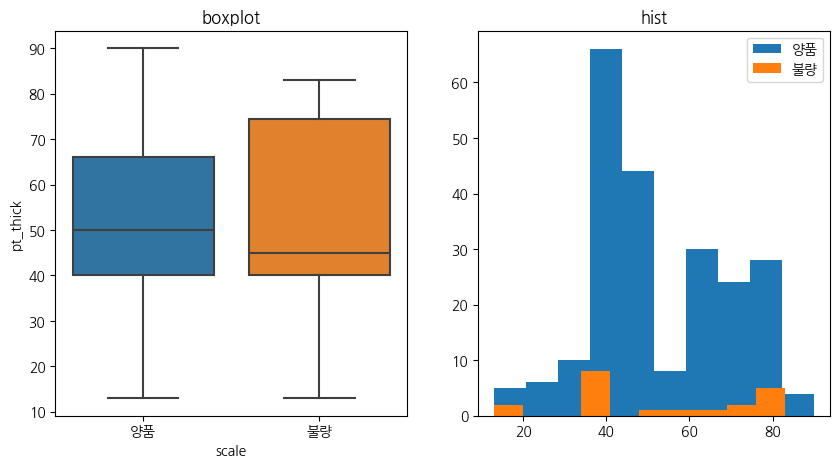

In [57]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'pt_thick', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['pt_thick'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['pt_thick'], label = '불량')
plt.legend()
plt.title('hist')

>pt_width

Text(0.5, 1.0, 'hist')

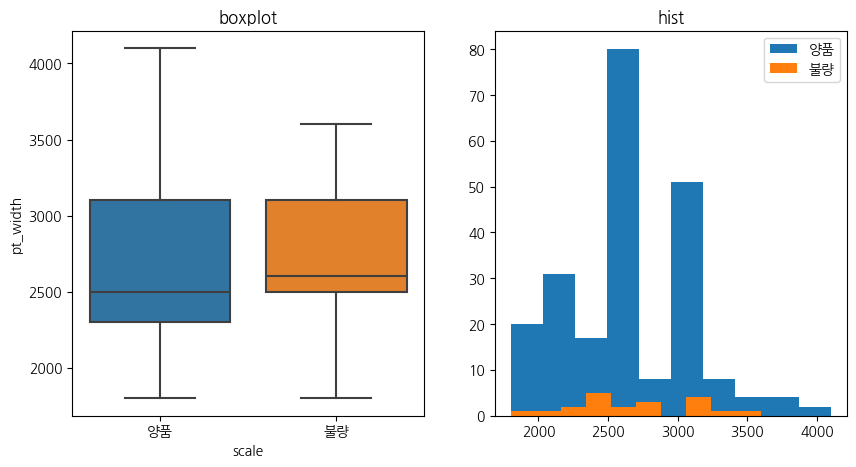

In [58]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'pt_width', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['pt_width'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['pt_width'], label = '불량')
plt.legend()
plt.title('hist')

> pt_length

Text(0.5, 1.0, 'hist')

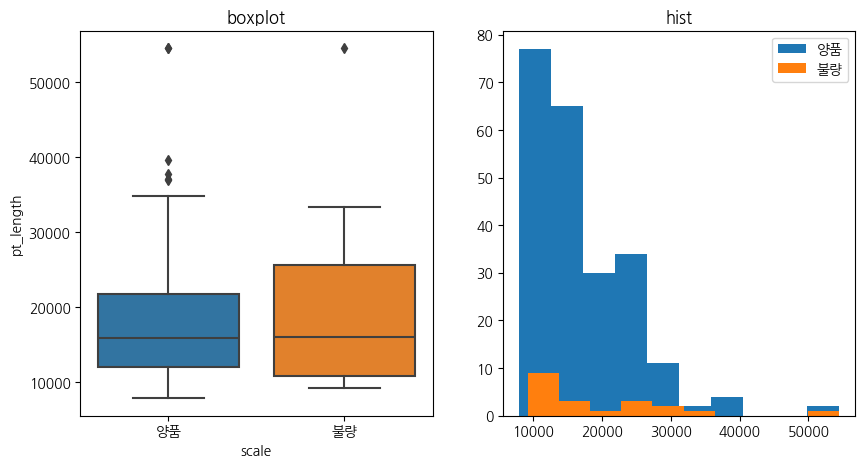

In [59]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'pt_length', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['pt_length'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['pt_length'], label = '불량')
plt.legend()
plt.title('hist')

> fur_heat_temp    

Text(0.5, 1.0, 'hist')

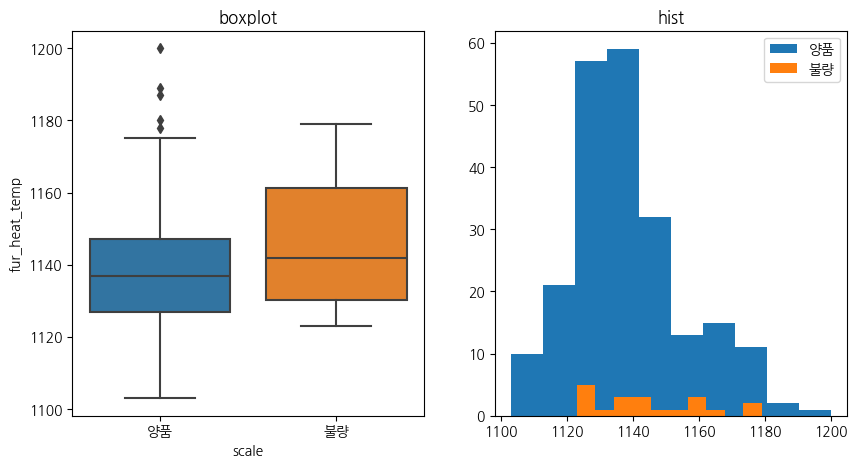

In [74]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_heat_temp', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['fur_heat_temp'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['fur_heat_temp'], label = '불량')
plt.legend()
plt.title('hist')

> fur_heat_time    

Text(0.5, 1.0, 'hist')

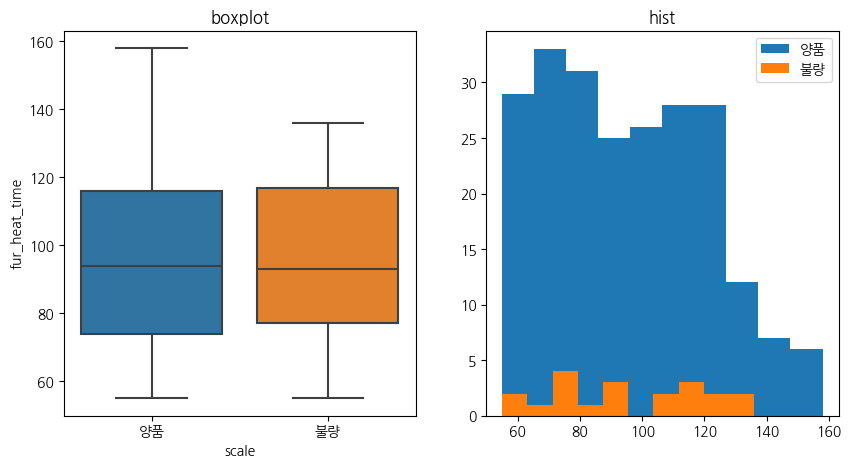

In [62]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_heat_time', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['fur_heat_time'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['fur_heat_time'], label = '불량')
plt.legend()
plt.title('hist')

> fur_soak_temp    

Text(0.5, 1.0, 'hist')

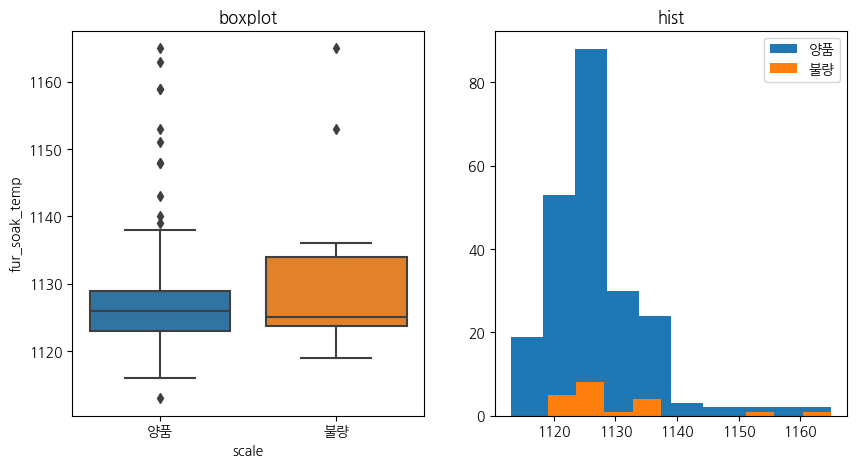

In [63]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_soak_temp', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['fur_soak_temp'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['fur_soak_temp'], label = '불량')
plt.legend()
plt.title('hist')

> fur_soak_time    

Text(0.5, 1.0, 'hist')

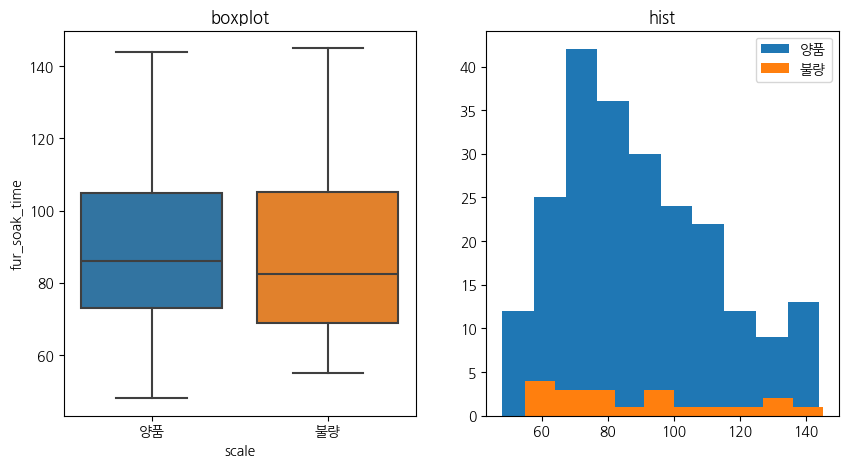

In [64]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_soak_time', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['fur_soak_time'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['fur_soak_time'], label = '불량')
plt.legend()
plt.title('hist')

> fur_total_time   

Text(0.5, 1.0, 'hist')

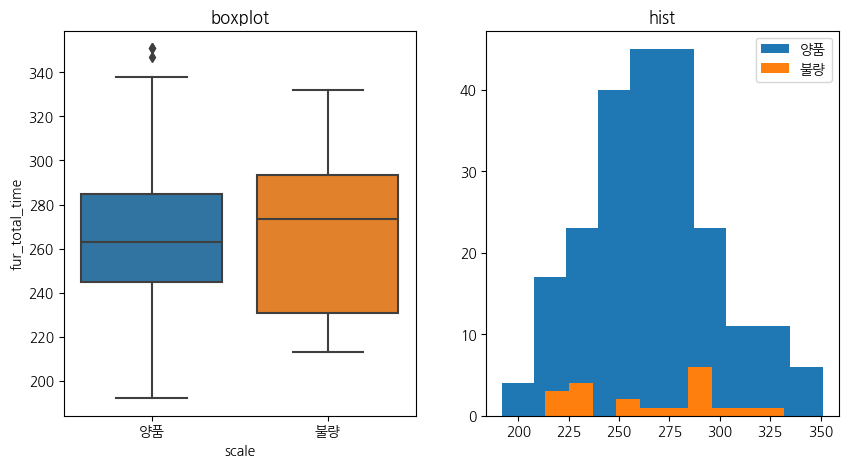

In [65]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_total_time', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['fur_total_time'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['fur_total_time'], label = '불량')
plt.legend()
plt.title('hist')

> fur_ex_temp      

Text(0.5, 1.0, 'hist')

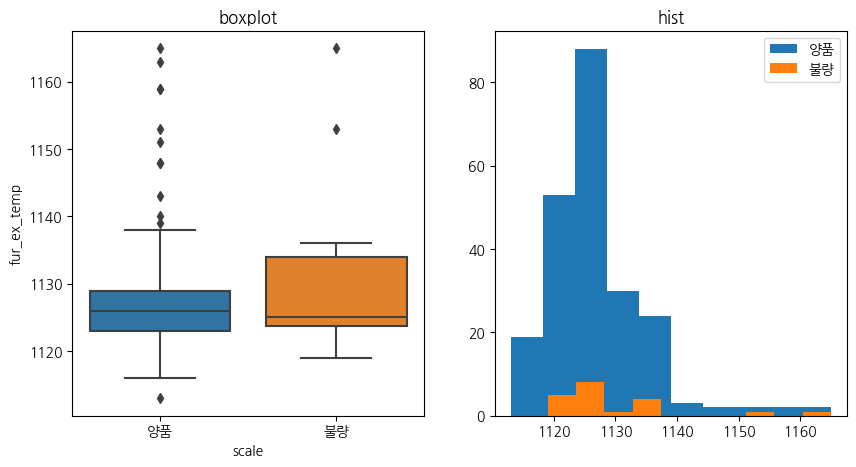

In [66]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'fur_ex_temp', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['fur_ex_temp'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['fur_ex_temp'], label = '불량')
plt.legend()
plt.title('hist')

> rolling_temp     

Text(0.5, 1.0, 'hist')

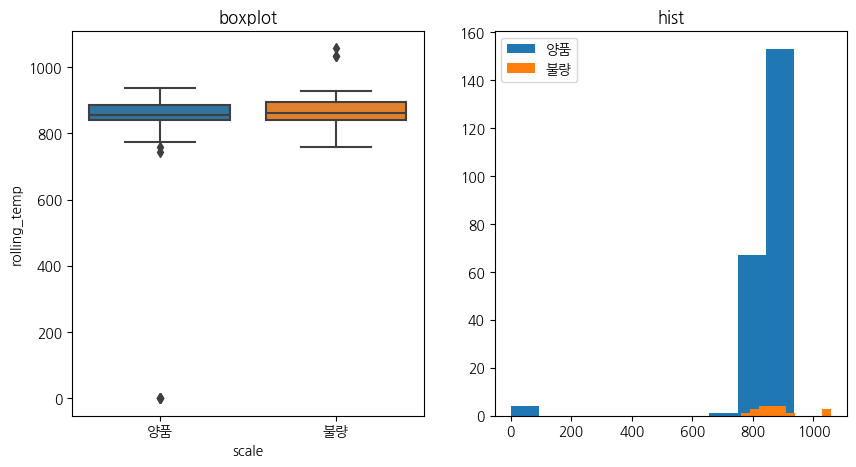

In [70]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'rolling_temp', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['rolling_temp'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['rolling_temp'], label = '불량')
plt.legend()
plt.title('hist')

In [71]:
df_T = df_T[df_T['rolling_temp'] > 200 ]

Text(0.5, 1.0, 'hist')

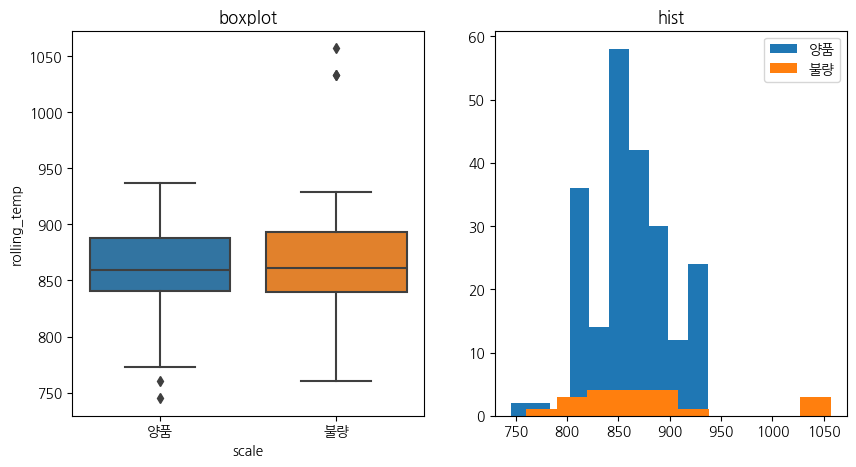

In [72]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'rolling_temp', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['rolling_temp'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['rolling_temp'], label = '불량')
plt.legend()
plt.title('hist')

> descaling_count  

Text(0.5, 1.0, 'hist')

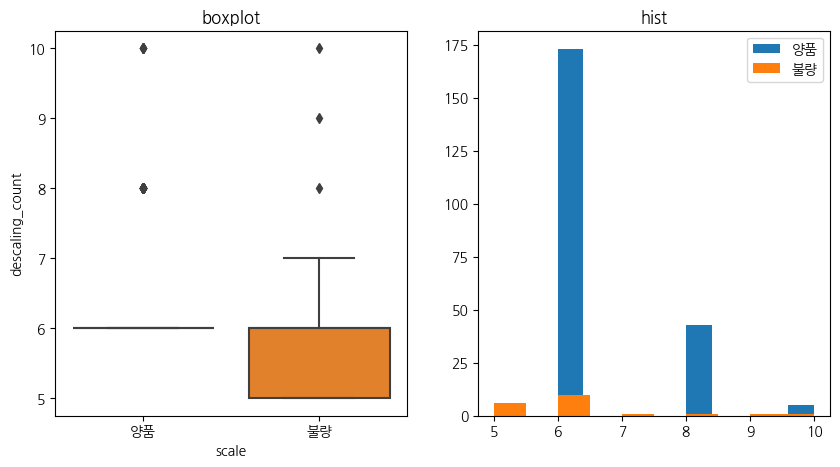

In [73]:
plt.figure(figsize = (10,5))


plt.subplot(1,2,1)
sns.boxplot( x = 'scale', y = 'descaling_count', data = df_T)
plt.title('boxplot')

plt.subplot(1,2,2)
plt.hist(df_T[df_T['scale'] == '양품']['descaling_count'] , label = '양품')
plt.hist(df_T[df_T['scale'] == '불량']['descaling_count'], label = '불량')
plt.legend()
plt.title('hist')

##### 범주형 데이터

> scale

<Axes: xlabel='scale', ylabel='count'>

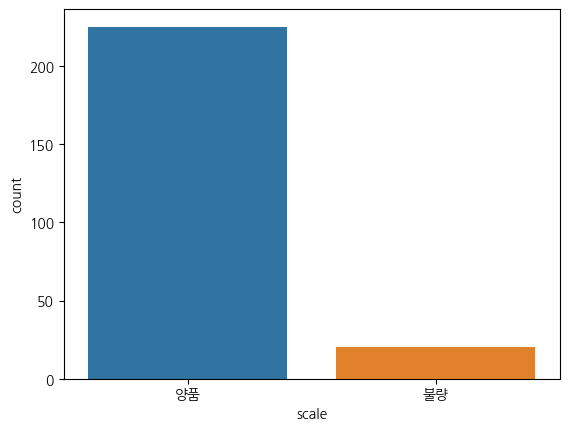

In [ ]:
sns.countplot(x = 'scale', data = df_T)

> spec_country

<Axes: xlabel='spec_country', ylabel='count'>

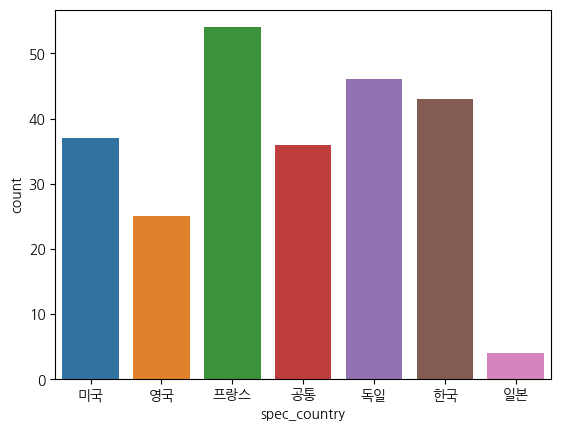

In [ ]:
sns.countplot(x = 'spec_country', data = df_T)

> hsb

<Axes: xlabel='hsb', ylabel='count'>

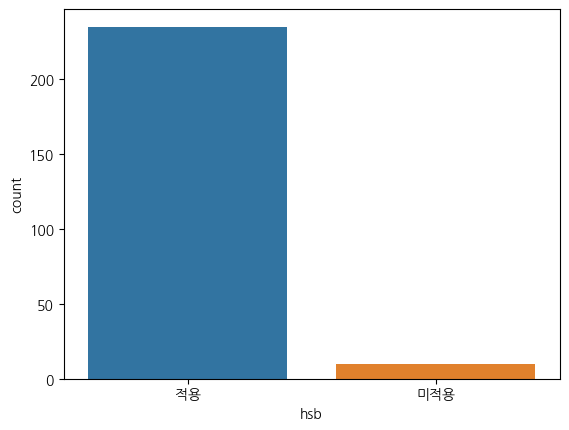

In [ ]:
sns.countplot(x = 'hsb', data = df_T)

> fur_no

<Axes: xlabel='fur_no', ylabel='count'>

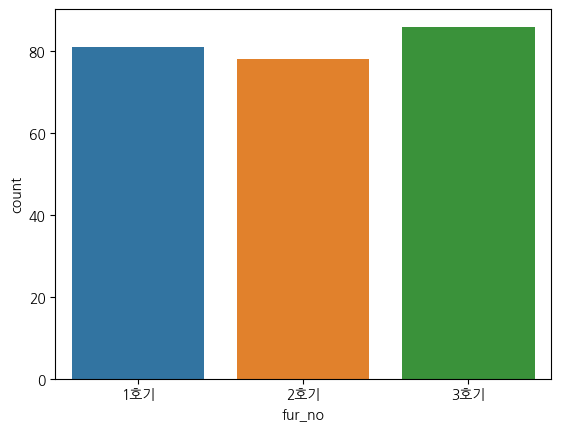

In [ ]:
sns.countplot(x = 'fur_no', data = df_T)

#### 탐색적 분석

In [ ]:
df_T.corr()

<ipython-input-26-f4511b77a046>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_T.corr()


,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
pt_thick,1.000000,-0.231071,-0.746851,-0.387462,0.185630,-0.285542,-0.068041,0.067415,-0.285542,-0.184990,-0.621102
pt_width,-0.231071,1.000000,-0.201343,0.090773,-0.151163,0.165177,-0.085259,-0.172723,0.165177,-0.017606,0.299435
pt_length,-0.746851,-0.201343,1.000000,0.338883,-0.111453,0.316700,0.032185,-0.027895,0.316700,0.112722,0.501888
fur_heat_temp,-0.387462,0.090773,0.338883,1.000000,-0.006840,0.616726,0.026829,0.016797,0.616726,0.105459,0.236650
fur_heat_time,0.185630,-0.151163,-0.111453,-0.006840,1.000000,-0.230853,-0.317075,0.516463,-0.230853,0.077378,-0.123184
fur_soak_temp,-0.285542,0.165177,0.316700,0.616726,-0.230853,1.000000,-0.334199,-0.412555,1.000000,0.084245,0.468898
fur_soak_time,-0.068041,-0.085259,0.032185,0.026829,-0.317075,-0.334199,1.000000,0.526746,-0.334199,0.028964,-0.347490
fur_total_time,0.067415,-0.172723,-0.027895,0.016797,0.516463,-0.412555,0.526746,1.000000,-0.412555,0.121853,-0.308571
fur_ex_temp,-0.285542,0.165177,0.316700,0.616726,-0.230853,1.000000,-0.334199,-0.412555,1.000000,0.084245,0.468898
rolling_temp,-0.184990,-0.017606,0.112722,0.105459,0.077378,0.084245,0.028964,0.121853,0.084245,1.000000,0.154218


- 로지스틱 회귀분석을 활용하여 다중공산성 확인 후
독립변수 끼리의 다중공산성을 제거하며 변수를 선택

- 주성분 분석도 사용할 수 있으나(프로젝트 때)

- ridge, lasso 회귀 모델 사용해서 다중 공산성 문제 해결

> 가설 검정
- 카이제곱 검정 : 범주형 목표변수와 범주형 독립변수끼리
- 분산분석

-----------

### 강종(Stell_kind) - C

In [ ]:
df_C = df[df['steel_kind'] == 'C']
df_C

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
117,PLT_1118,04JAN2023:03:00:41,양품,BV-B,프랑스,C,20,3600,39300,적용,...,1129,76,1126,118,297,1126,CR(제어압연),934,8,2조
118,PLT_1119,04JAN2023:03:14:24,양품,BV-B,프랑스,C,20,3600,39500,적용,...,1140,68,1132,104,235,1132,CR(제어압연),911,8,2조
119,PLT_1120,04JAN2023:03:19:27,양품,AB/B,미국,C,17,3400,39600,적용,...,1130,71,1130,112,240,1130,CR(제어압연),935,10,2조
120,PLT_1121,04JAN2023:03:28:12,양품,LR-B,영국,C,17,3400,39600,적용,...,1130,71,1130,112,287,1130,CR(제어압연),935,10,2조
121,PLT_1122,04JAN2023:03:42:56,양품,JS-SM490YB,일본,C,14,3300,51200,적용,...,1140,80,1131,117,286,1131,CR(제어압연),915,10,2조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조
